# "Voices Heard" Data Analysis

## I. Imports

In [149]:
import numpy as np
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [119]:
df = pd.read_csv("data/voicesHeard.csv")
df = df.drop(labels="Count", axis=1)
df

,Genre,Reports,Age,Gpa,Year,Gender
0,Academic Support and Resources,The limited access to research databases and m...,27,2.18,2,M
1,Academic Support and Resources,I'm having trouble finding the course material...,23,3.11,2,F
2,Academic Support and Resources,It's frustrating to have limited access to res...,20,3.68,2,F
3,Academic Support and Resources,I'm really struggling in one of my classes but...,20,1.30,2,F
4,Academic Support and Resources,I am really struggling with understanding the...,26,2.50,2,F
...,...,...,...,...,...,...
1000,Food and Cantines,26. I have been unable to find food that meets...,18,1.16,4,M
1001,Food and Cantines,27. I have been unable to find food that I can...,20,4.05,2,M
1002,Food and Cantines,28. I have been unable to find food that I enjoy.,22,1.86,3,M
1003,Food and Cantines,29. I have been unable to find food that is he...,20,2.06,2,M


#### Variable Breakdown
We have 1,005 entries along 7 feature columns.
Continuous: ```Age```, ```Gpa```
Categorical: ```Genre```, ```Year```, ```Gender```
Textual: ```Reports```
Unknown: ```Count```

## II. EDA

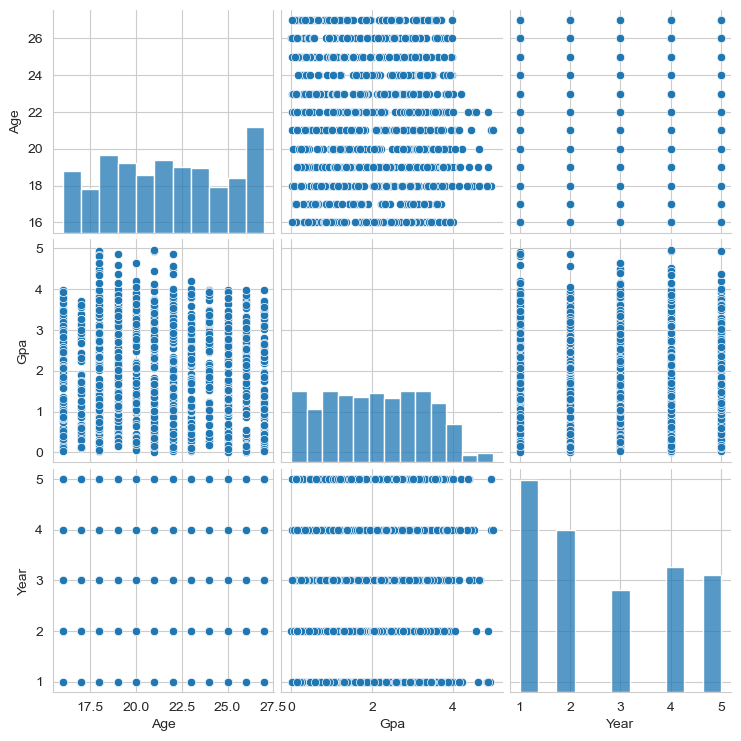

In [120]:
sns.pairplot(data=df)
plt.show()

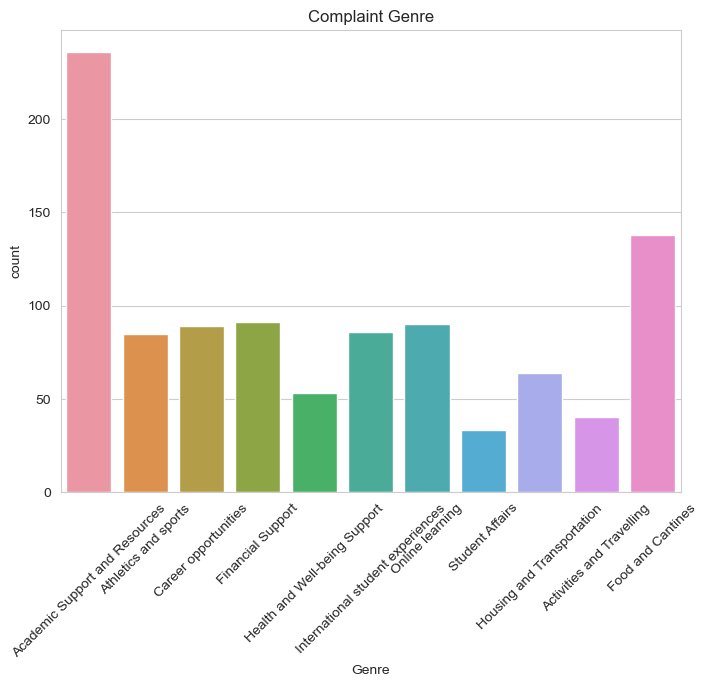

In [121]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Genre")
plt.xticks(rotation=45)
plt.title("Complaint Genre")
plt.show()

In [122]:
df["Genre"].value_counts()

Academic Support and Resources       236
Food and Cantines                    138
Financial Support                     91
Online learning                       90
Career opportunities                  89
International student experiences     86
Athletics and sports                  85
Housing and Transportation            64
Health and Well-being Support         53
Activities and Travelling             40
Student Affairs                       33
Name: Genre, dtype: int64

So, it looks like "Academic Support" is the largest genre of complaints, followed by "Food and Cantines". Meanwhile, "Activities and Travelling", "Health and Well-being Support", and "Housing and Transportation" appear to compose the bottom three. The remaining bins are roughly equal in size (about as likely).

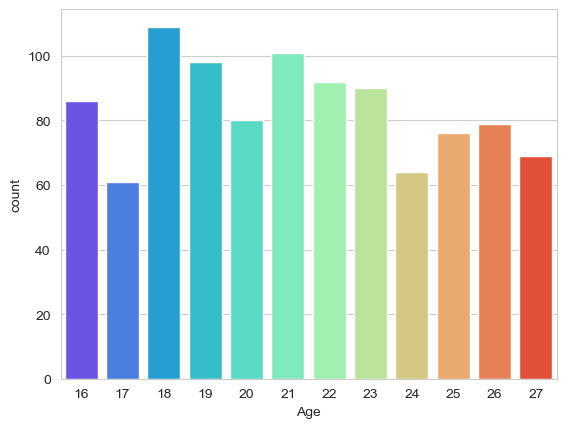

In [123]:
sns.countplot(data=df, x="Age", palette="rainbow")
plt.show()

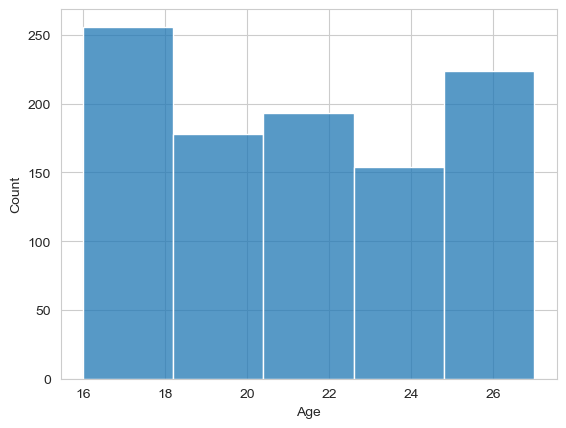

In [124]:
sns.histplot(data=df, x="Age", bins=5)
plt.show()

In [125]:
df["Age"].describe()

count    1005.000000
mean       21.298507
std         3.338841
min        16.000000
25%        18.000000
50%        21.000000
75%        24.000000
max        27.000000
Name: Age, dtype: float64

In [126]:
print("Mode: {}".format(df["Age"].value_counts(ascending=False).index[0]))
print("Skewness: {:.4f}".format(sci.stats.skew(df["Age"].to_numpy())))

Mode: 18
Skewness: 0.0983


We have a fairly balanced age range. It does skew slightly younger, with mean age 18 and average 21.

## III. Feature Engineering

In [127]:
df["textLen"] = df["Reports"].apply(lambda x: len(str(x).split()))
df.drop(labels="Reports", axis=1, inplace=True)
df

,Genre,Age,Gpa,Year,Gender,textLen
0,Academic Support and Resources,27,2.18,2,M,26
1,Academic Support and Resources,23,3.11,2,F,24
2,Academic Support and Resources,20,3.68,2,F,35
3,Academic Support and Resources,20,1.30,2,F,31
4,Academic Support and Resources,26,2.50,2,F,24
...,...,...,...,...,...,...
1000,Food and Cantines,18,1.16,4,M,13
1001,Food and Cantines,20,4.05,2,M,12
1002,Food and Cantines,22,1.86,3,M,11
1003,Food and Cantines,20,2.06,2,M,13


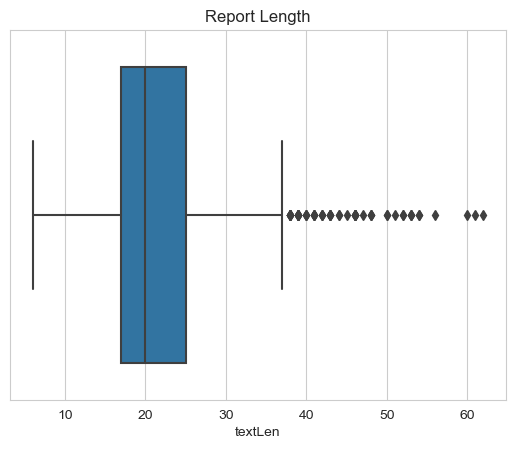

In [128]:
sns.boxplot(data=df, x="textLen")
plt.title("Report Length")
plt.show()

In [129]:
df["isMale"] = df["Gender"].apply(lambda x: 1 if x=="M" else 0)
df.drop(labels="Gender", axis=1, inplace=True)
df["Genre"] = df["Genre"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Genre    1005 non-null   category
 1   Age      1005 non-null   int64   
 2   Gpa      1005 non-null   float64 
 3   Year     1005 non-null   int64   
 4   textLen  1005 non-null   int64   
 5   isMale   1005 non-null   int64   
dtypes: category(1), float64(1), int64(4)
memory usage: 40.7 KB


In [130]:
labelCodes = {l:i for i, l in enumerate(df["Genre"].cat.categories.tolist())}
labelCodes

{'Academic Support and Resources': 0,
 'Activities and Travelling': 1,
 'Athletics and sports': 2,
 'Career opportunities': 3,
 'Financial Support': 4,
 'Food and Cantines': 5,
 'Health and Well-being Support': 6,
 'Housing and Transportation': 7,
 'International student experiences': 8,
 'Online learning': 9,
 'Student Affairs': 10}

In [131]:
df["Genre"] = df["Genre"].apply(lambda x: labelCodes[x]).astype("int64")
df

,Genre,Age,Gpa,Year,textLen,isMale
0,0,27,2.18,2,26,1
1,0,23,3.11,2,24,0
2,0,20,3.68,2,35,0
3,0,20,1.30,2,31,0
4,0,26,2.50,2,24,0
...,...,...,...,...,...,...
1000,5,18,1.16,4,13,1
1001,5,20,4.05,2,12,1
1002,5,22,1.86,3,11,1
1003,5,20,2.06,2,13,1


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Genre    1005 non-null   int64  
 1   Age      1005 non-null   int64  
 2   Gpa      1005 non-null   float64
 3   Year     1005 non-null   int64  
 4   textLen  1005 non-null   int64  
 5   isMale   1005 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 47.2 KB


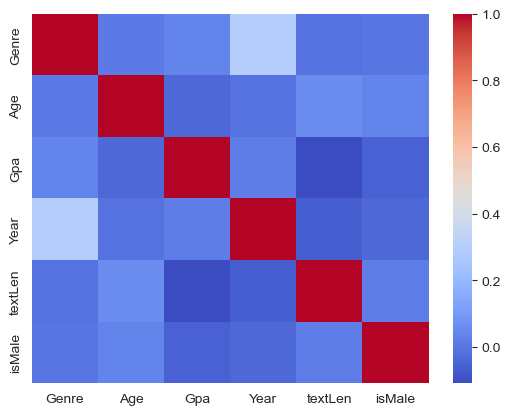

In [133]:
sns.heatmap(data=df.corr(), cmap="coolwarm")
plt.show()

Unfortunately, our numerical variables appear to have relatively low correlation scores with our target variable ```Genre```. This puts a bit of a damper on my hopes, but let's give it a shot anyway.

## IV. Modeling Process

In [164]:
X = df[["Age", "isMale", "Gpa", "Year", "textLen"]]
y = df["Genre"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### A. Decision Tree model

In [165]:
dtc = DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)
dtc_preds = dtc.predict(X_test)

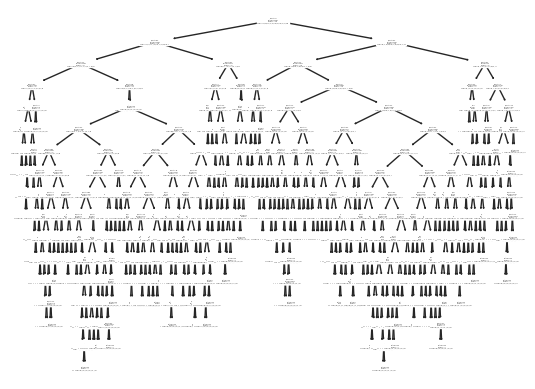

In [166]:
plot_tree(dtc)
plt.show()

In [167]:
dtc_accuracy = accuracy_score(y_test, dtc_preds)
dtc_mean_score = cross_val_score(estimator=dtc, X=X, y=y).mean()

### B. Random Forest ensemble model

In [168]:
rfc = RandomForestClassifier(criterion="entropy").fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)

In [169]:
rfc_accuracy = accuracy_score(y_test, rfc_preds)
rfc_mean_score = cross_val_score(estimator=rfc, X=X, y=y).mean()

### C. Support Vector Machine model

In [170]:
svc = make_pipeline(StandardScaler(), SVC()).fit(X_train, y_train)
svc

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [171]:
svc_preds = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_preds)
svc_mean_score = cross_val_score(estimator=svc, X=X, y=y).mean()

### D. Model Fit and Assessment

In [176]:
pd.DataFrame.from_dict({"DecisionTreeClassifier()": [dtc_accuracy, dtc_mean_score],
                        "RandomForestClassifier()": [rfc_accuracy, rfc_mean_score],
                        "SVC()": [svc_accuracy, svc_mean_score]}, orient="index", columns=["Accuracy", "Mean CV Score"])


,Accuracy,Mean CV Score
DecisionTreeClassifier(),0.317460,0.265672
RandomForestClassifier(),0.365079,0.360199
SVC(),0.452381,0.399005


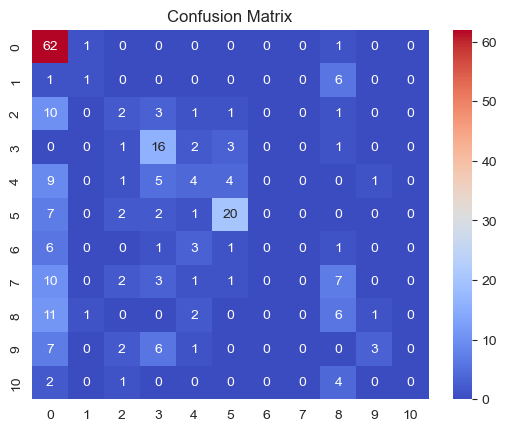

In [177]:
sns.heatmap(data=confusion_matrix(y_test, svc_preds), annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.show()

In [178]:
# TODO: Examine Misclassified entries

In [184]:
df["svc_preds"] = svc.predict(X)
misses = df[df["svc_preds"] != df["Genre"]]
misses

,Genre,Age,Gpa,Year,textLen,isMale,svc_preds
3,0,20,1.30,2,31,0,8
19,0,20,3.37,2,17,0,5
20,0,25,1.15,2,18,1,9
26,0,21,1.55,2,16,1,4
174,0,18,1.15,1,53,0,8
...,...,...,...,...,...,...,...
954,5,22,1.59,1,12,0,0
976,5,23,1.70,1,11,1,0
985,5,20,1.20,5,8,1,3
1000,5,18,1.16,4,13,1,3


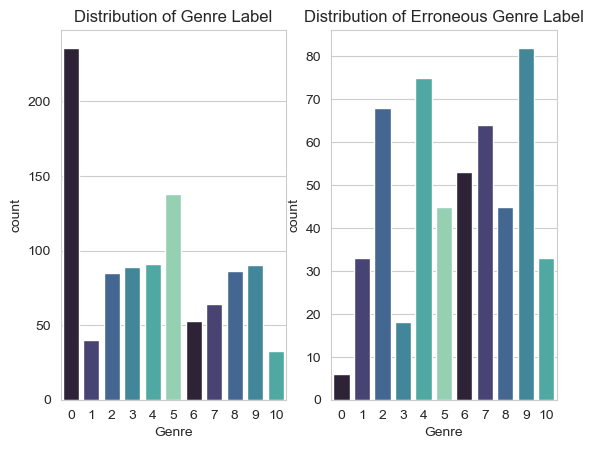

In [198]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.countplot(data=df, x="Genre", ax=ax1, palette=sns.color_palette("mako"))
ax1.set_title("Distribution of Genre Label")
sns.countplot(data=misses, x="Genre", ax=ax2, palette=sns.color_palette("mako"))
ax2.set_title("Distribution of Erroneous Genre Label")
plt.show()

In [201]:
df["Genre"].value_counts()

0     236
5     138
4      91
9      90
3      89
8      86
2      85
7      64
6      53
1      40
10     33
Name: Genre, dtype: int64

In [203]:
misses["Genre"].value_counts(ascending=True)

0      6
3     18
10    33
1     33
8     45
5     45
6     53
7     64
2     68
4     75
9     82
Name: Genre, dtype: int64

Of note, we can see that Genre 0: Academic Support and Resources, which makes up the majority of complaints, has the least false predictions. It appears that the unbalanced dataset may be causing our model to suffer.

<AxesSubplot: >

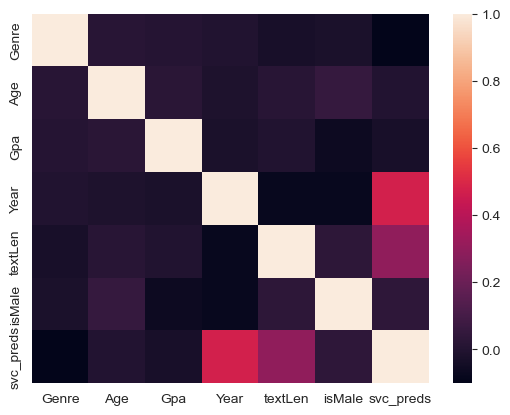

In [205]:
sns.heatmap(misses.corr())

In [206]:
misses.corr()["Genre"]

Genre        1.000000
Age          0.017362
Gpa          0.007609
Year        -0.003111
textLen     -0.029507
isMale      -0.021775
svc_preds   -0.101462
Name: Genre, dtype: float64